# Clustering with MeanShift

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import cluster
from sklearn import manifold

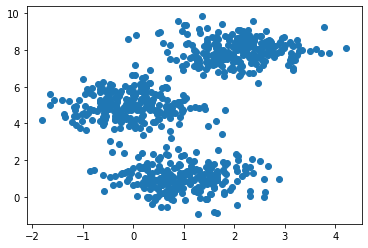

In [2]:
data, labels_true = datasets.make_blobs(n_samples=750, centers=[[1,1],[0,5],[2,8]], cluster_std=0.7,
                            random_state=0)
_ = plt.scatter(data[:,0], data[:,1])

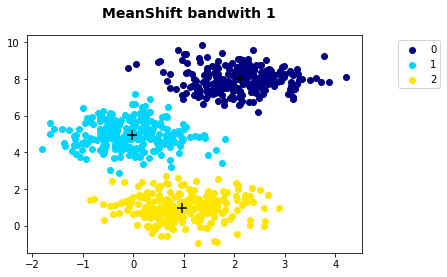

In [3]:
df = pd.DataFrame(data, columns=['X', 'Y'])

meanshift = cluster.MeanShift(bandwidth=1)
label = meanshift.fit_predict(df)
df['label'] = label


fig = plt.figure()
fig.suptitle('MeanShift bandwith 1', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)


for l in np.unique(label):
    plt.scatter(df[df.label == l].X, df[df.label == l].Y, label=l, color=plt.cm.jet(float(l) / np.max(label + 1)))


for i in meanshift.cluster_centers_:
    plt.scatter(i[0], i[1], color='black', marker='+', s=100)

_ = plt.legend(bbox_to_anchor=(1.25, 1))

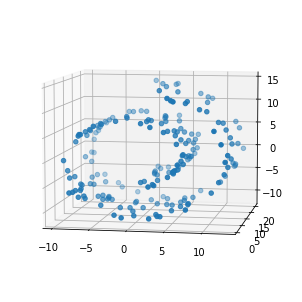

In [4]:
data, t = datasets.make_swiss_roll(n_samples=200, noise=0.1, random_state=0)
df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

_ = ax.scatter(df.X, df.Y, df.Z, 'o')

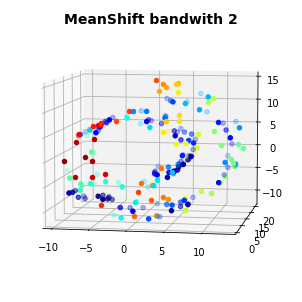

In [5]:
meanshift = cluster.MeanShift(bandwidth=2)
label = meanshift.fit_predict(data)
df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)



for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(float(l) / len(np.unique(label))), label=l)
    
_ = fig.suptitle('MeanShift bandwith 2', fontsize=14, fontweight='bold')


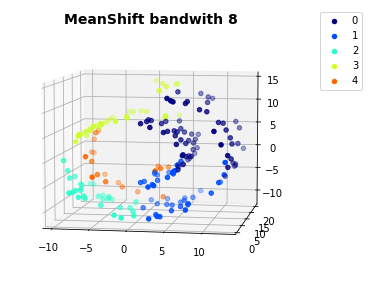

In [6]:
meanshift = cluster.MeanShift(bandwidth=8)
label = meanshift.fit_predict(data)
df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)


for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(float(l) / len(np.unique(label))), label=l)

fig.suptitle('MeanShift bandwith 8', fontsize=14, fontweight='bold')

_ = plt.legend(bbox_to_anchor=(1.25, 1))

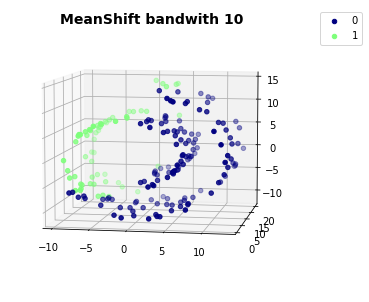

In [7]:
meanshift = cluster.MeanShift(bandwidth=10)
label = meanshift.fit_predict(data)
df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)



for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(float(l) / len(np.unique(label))), label=l)

fig.suptitle('MeanShift bandwith 10', fontsize=14, fontweight='bold')

_ = plt.legend(bbox_to_anchor=(1.25, 1))